# Capstone Project - The Battle of Neighborhoods (Week 2)
# This project investigates whether Philadelphia Bars offering a Saturday Special on https://philly.thedrinknation.com/specials/Saturday# have more FourSquare Likes vs Philadelphia bars on FourSquare that do not.

# Import packages

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

Solving environment: done

# All requested packages already installed.



# Use BeautifulSoup to scrape website

In [2]:
html_doc = requests.get('https://philly.thedrinknation.com/specials/Saturday#').text
soup = BeautifulSoup(html_doc, 'html.parser')
mydivs = soup.findAll("div", {"class": "barMeta"})

# Define empty lists for bar names, addresses, and neighborhood for bars with Saturday specials

In [3]:
bar_name_list = []
nhood_list = []
bar_address_list = []

# Parse the name of each bar, its address, and the Philly neighborhood they are located in

In [4]:
for div in mydivs:
    #Scrape the name of each bar and the Philly neighborhood they are located in
    x = div.find("h2")
    if x:
        bar_name_nhood = x.text
        bar_name_nhood = bar_name_nhood.replace("\n","")
        bar_name_nhood = bar_name_nhood.replace("      ","*")
        bar_name_nhood = bar_name_nhood.replace("* ","")
        if bar_name_nhood[:-1] != "*":
            bar_name_nhood = bar_name_nhood + "*"
        bar_name_nhood = bar_name_nhood.split("*")
        bar_name = bar_name_nhood[1]
        nhood = bar_name_nhood[2]
        bar_name_list.append(bar_name)
        nhood_list.append(nhood)
    #Scrape the bar address of each bar
    bar_address = div.text
    bar_address = bar_address.split("\n")
    bar_address = bar_address[4]
    bar_address = bar_address.replace("    ","*")
    bar_address = bar_address.split("*")
    bar_address = bar_address[1]
    bar_address = bar_address.split(";")
    bar_address = bar_address[0]
    if bar_address != "":
        bar_address = bar_address + " Philadelphia, PA"
    bar_address_list.append(bar_address)


# Create pandas dataframe for Philly bars advertising Saturday specials on https://philly.thedrinknation.com/specials/Saturday# website

In [5]:
Sat_special_df = pd.DataFrame()
Sat_special_df['BarName'] = bar_name_list
Sat_special_df['BarAddress'] = bar_address_list
Sat_special_df['Neighborhood'] = nhood_list
Sat_special_df['BarAddress'][18] = "2 Rector Street Philadelphia, PA"

In [6]:
Sat_special_df.head(3)

,BarName,BarAddress,Neighborhood
0,12 Steps Down,"831 Christian Street Philadelphia, PA",South Philly
1,2nd Story Brewing,"117 Chestnut Street Philadelphia, PA",Old City
2,2nd Street Brew House,"1700 S 2nd Street Philadelphia, PA",South Philly


# Get Latitude and Longitude Coordinates of Bars Advertising Saturday Specials

In [7]:
lat_long_list=[]
for j in range(len(bar_address_list)):
    address = bar_address_list[j]
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        lat_long = latitude, longitude
        lat_long_list.append(lat_long)
    else:
        lat_long = ""
        lat_long_list.append(lat_long)
    
#print(lat_long_list)

In [8]:
special_lat_list = []
special_long_list = []
for d in range(len(lat_long_list)):
    current_lat_long = str(lat_long_list[d])
    if current_lat_long != '':
        current_lat_long2 = current_lat_long.replace("(","")
        current_lat_long2 = current_lat_long2.replace(")","")
        current_lat_long2 = current_lat_long2.split(',')
        special_lat = current_lat_long2[0]
        special_long = current_lat_long2[1]
        special_lat_list.append(special_lat)
        special_long_list.append(special_long)
    else:
        special_lat = ""
        special_long = ""
        special_lat_list.append(special_lat)
        special_long_list.append(special_long)

#print(special_lat_list)
#print(special_long_list)

# Add Latitude and Longitude Values to Sat_special_df dataframe

In [9]:
Sat_special_df['Latitude'] = special_lat_list
Sat_special_df['Longitude'] = special_long_list
Sat_special_df.head(3)

,BarName,BarAddress,Neighborhood,Latitude,Longitude
0,12 Steps Down,"831 Christian Street Philadelphia, PA",South Philly,39.9390528,-75.1576839
1,2nd Story Brewing,"117 Chestnut Street Philadelphia, PA",Old City,39.951862,-75.1718895
2,2nd Street Brew House,"1700 S 2nd Street Philadelphia, PA",South Philly,39.926601,-75.149315


# Exclude Bars for which Latitude/Longitude values could not be found

In [10]:
Sat_special_df_clean = Sat_special_df[Sat_special_df.Latitude != '']
Sat_special_df_clean.reset_index(drop=True, inplace=True)


# Display Sat_special_df_clean dataframe

In [11]:
Sat_special_df_clean

,BarName,BarAddress,Neighborhood,Latitude,Longitude
0,12 Steps Down,"831 Christian Street Philadelphia, PA",South Philly,39.9390528,-75.1576839
1,2nd Story Brewing,"117 Chestnut Street Philadelphia, PA",Old City,39.951862,-75.1718895
2,2nd Street Brew House,"1700 S 2nd Street Philadelphia, PA",South Philly,39.926601,-75.149315
3,a.bar,"135 S 18th Street Philadelphia, PA",Rittenhouse,39.9504178,-75.1704316840335
4,Abbaye,"637 N. 3rd Street Philadelphia, PA",Northern Liberties,39.9622191,-75.1429705
5,Abe Fisher,"1623 Sansom Street Philadelphia, PA",,39.9506934,-75.1682925
6,Adobe Cafe - South Philly,"1919 E. Passyunk Avenue Philadelphia, PA",South Philly,39.9261012,-75.1676903
7,Amada,"217 Chestnut Street Philadelphia, PA",Old City,39.9485657,-75.1448374
8,Atlantis,"2442 Frankford Avenue Philadelphia, PA",Kensington,39.999272,-75.099606
9,B Side Lounge,"241 Chestnut Street Philadelphia, PA",Old City,39.94883905,-75.1458445113693


# Make FourSquare API calls to Get Venue Id's For Bars Advertising Saturday Specials

In [12]:
CLIENT_ID = 'RH450GTDK0BKJSWDTDBEGEHZZ31L441U0GASJOL4EOHCI2FW' # your Foursquare ID
CLIENT_SECRET = 'L2X54V5GGL3WOS3EHIDAIGTZEZZC4FCRHVTVC1PCXVUJVKJ4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1

In [13]:
venue_id_list=[]
FS_name_list=[]
FS_address_list=[]
for o in range(len(Sat_special_df_clean)):
    search_query = Sat_special_df_clean['BarName'][o]
    radius = 24140
    latitude = Sat_special_df_clean['Latitude'][o]
    longitude = Sat_special_df_clean['Longitude'][o]
    #print(search_query + ' .... OK!')

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    #url    
    results = requests.get(url).json()
    #print(results)
    venue_id = results['response']['venues'][0]['id']
    FS_name = results['response']['venues'][0]['name']

    venue_id_list.append(venue_id)
    FS_name_list.append(FS_name)

    
#print(venue_id_list)
#print(FS_name_list)

# Add Name and VenueId from FourSquare API response to data frame

In [14]:
print(venue_id_list)
print(FS_name_list)
Sat_special_df_clean.head(3)

['40b28c80f964a520bdfa1ee3', '53b5cade498e7e8bccf28069', '4d7c115e73ca54810712587c', '51e4b307498eb7f2d3e8a95b', '43e9e70bf964a5201f2f1fe3', '5403c33a498e173768cad8d7', '4ac5025af964a520f09f20e3', '458e2cc4f964a5200e401fe3', '4a9b5d0ff964a520013520e3', '50e900aee4b0b1ba742b154a', '4f7c889ae4b04f03386c997f', '4ade60caf964a520737521e3', '526e7ebc11d2b0b38d9d25f6', '526e7ebc11d2b0b38d9d25f6', '54de927b498ef276a133669f', '415def80f964a520571d1fe3', '41478600f964a520ba1c1fe3', '51c2630d79c91341dcb2bf3c', '5b23394386f4cc0038a029c7', '3fd66200f964a5201cee1ee3', '4aac39d5f964a520015d20e3', '40b28c80f964a52028f91ee3', '4a0bad33f964a5200a751fe3', '4c6d1fb56af58cfab17d8817', '597397c3851de565cc92bc6d', '5140a49be4b0e52a4b103e6b', '4b81cb41f964a5206ebe30e3', '4ae3a098f964a5206d9721e3', '58f24550c8772e1a05d404cd', '4c1448c4a1010f47c6474c18', '4c6d1fb56af58cfab17d8817', '40b28c80f964a520c6f91ee3', '4a36b962f964a520d99d1fe3', '40b28c80f964a5202bf91ee3', '4a18041df964a52074791fe3', '40b28c80f964a520ca

,BarName,BarAddress,Neighborhood,Latitude,Longitude
0,12 Steps Down,"831 Christian Street Philadelphia, PA",South Philly,39.9390528,-75.1576839
1,2nd Story Brewing,"117 Chestnut Street Philadelphia, PA",Old City,39.951862,-75.1718895
2,2nd Street Brew House,"1700 S 2nd Street Philadelphia, PA",South Philly,39.926601,-75.149315


In [15]:
Sat_special_df_clean['VenueID'] = venue_id_list
Sat_special_df_clean['FS_name'] = FS_name_list

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
Sat_special_df_clean

,BarName,BarAddress,Neighborhood,Latitude,Longitude,VenueID,FS_name
0,12 Steps Down,"831 Christian Street Philadelphia, PA",South Philly,39.9390528,-75.1576839,40b28c80f964a520bdfa1ee3,12 Steps Down
1,2nd Story Brewing,"117 Chestnut Street Philadelphia, PA",Old City,39.951862,-75.1718895,53b5cade498e7e8bccf28069,2nd Story Brewing Company
2,2nd Street Brew House,"1700 S 2nd Street Philadelphia, PA",South Philly,39.926601,-75.149315,4d7c115e73ca54810712587c,2nd Street Brewhouse
3,a.bar,"135 S 18th Street Philadelphia, PA",Rittenhouse,39.9504178,-75.1704316840335,51e4b307498eb7f2d3e8a95b,a.bar
4,Abbaye,"637 N. 3rd Street Philadelphia, PA",Northern Liberties,39.9622191,-75.1429705,43e9e70bf964a5201f2f1fe3,The Abbaye
5,Abe Fisher,"1623 Sansom Street Philadelphia, PA",,39.9506934,-75.1682925,5403c33a498e173768cad8d7,Abe Fisher
6,Adobe Cafe - South Philly,"1919 E. Passyunk Avenue Philadelphia, PA",South Philly,39.9261012,-75.1676903,4ac5025af964a520f09f20e3,Adobe Cafe
7,Amada,"217 Chestnut Street Philadelphia, PA",Old City,39.9485657,-75.1448374,458e2cc4f964a5200e401fe3,Amada
8,Atlantis,"2442 Frankford Avenue Philadelphia, PA",Kensington,39.999272,-75.099606,4a9b5d0ff964a520013520e3,Atlantis: The Lost Bar
9,B Side Lounge,"241 Chestnut Street Philadelphia, PA",Old City,39.94883905,-75.1458445113693,50e900aee4b0b1ba742b154a,B Side Hookah


# Use Venue IDs to make FourSquare API calls to get number of likes for each bar that advertises Saturday Specials

In [17]:
special_bar_count_list = []
for sbar in range(len(Sat_special_df_clean)):
    VENUE_ID = Sat_special_df_clean['VenueID'][sbar]
    url2 = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(VENUE_ID, CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url2).json()
    sbar_count = results['response']['likes']['count']
    special_bar_count_list.append(sbar_count)
#print(special_bar_count_list)

# Double-check correct number of likes was retrieved and add likes to Saturday Special Bar dataframe

In [18]:
len(special_bar_count_list)

102

In [19]:
Sat_special_df_clean['Likes'] = special_bar_count_list

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
Sat_special_df_clean.head()

,BarName,BarAddress,Neighborhood,Latitude,Longitude,VenueID,FS_name,Likes
0,12 Steps Down,"831 Christian Street Philadelphia, PA",South Philly,39.9390528,-75.1576839,40b28c80f964a520bdfa1ee3,12 Steps Down,39
1,2nd Story Brewing,"117 Chestnut Street Philadelphia, PA",Old City,39.951862,-75.1718895,53b5cade498e7e8bccf28069,2nd Story Brewing Company,129
2,2nd Street Brew House,"1700 S 2nd Street Philadelphia, PA",South Philly,39.926601,-75.149315,4d7c115e73ca54810712587c,2nd Street Brewhouse,20
3,a.bar,"135 S 18th Street Philadelphia, PA",Rittenhouse,39.9504178,-75.1704316840335,51e4b307498eb7f2d3e8a95b,a.bar,72
4,Abbaye,"637 N. 3rd Street Philadelphia, PA",Northern Liberties,39.9622191,-75.1429705,43e9e70bf964a5201f2f1fe3,The Abbaye,116


# Use Four Square Category ID for bars to make API calls to get list of Philadelphia Bars Not Advertising Saturday Specials on Website

In [21]:
#four square category id for "Bars"
cat_id = "4bf58dd8d48988d116941735"
#radius = 24140
#Philadelphia lat, long
latitude2 = 39.9526
longitude2 = 75.1652
near = "Philadelphia, PA"
limit = 100
#print(search_query + ' .... OK!')

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&categoryId={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, near, VERSION, cat_id, limit)
#url    
results = requests.get(url).json()
print(results)

{'response': {'confident': False, 'venues': [{'hasPerk': False, 'location': {'country': 'United States', 'state': 'PA', 'formattedAddress': ['1310 Drury St (btwn S 13th & Juniper St)', 'Philadelphia, PA 19107', 'United States'], 'postalCode': '19107', 'cc': 'US', 'city': 'Philadelphia', 'lng': -75.16257932209294, 'lat': 39.95022340834235, 'address': '1310 Drury St', 'crossStreet': 'btwn S 13th & Juniper St', 'labeledLatLngs': [{'label': 'display', 'lng': -75.16257932209294, 'lat': 39.95022340834235}]}, 'referralId': 'v-1556978954', 'venuePage': {'id': '33088944'}, 'id': '3fd66200f964a520e6f11ee3', 'categories': [{'shortName': 'Pub', 'pluralName': 'Pubs', 'name': 'Pub', 'primary': True, 'id': '4bf58dd8d48988d11b941735', 'icon': {'suffix': '.png', 'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_'}}], 'name': "McGillin's Olde Ale House"}, {'hasPerk': False, 'delivery': {'url': 'https://www.grubhub.com/restaurant/butcher--singer-1500-walnut-st-philadelphia/344359?affiliate=

# Format api response into a dataframe

In [22]:
FSPhilly_bars = results['response']['venues']

In [23]:
FSPhilly_bars_df = json_normalize(FSPhilly_bars)

In [24]:
FSPhilly_bars_df.head(3)

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'shortName': 'Pub', 'pluralName': 'Pubs', 'p...",NaN,NaN,NaN,NaN,NaN,NaN,False,3fd66200f964a520e6f11ee3,1310 Drury St,...,"[1310 Drury St (btwn S 13th & Juniper St), Phi...","[{'label': 'display', 'lng': -75.1625793220929...",39.950223,-75.162579,NaN,19107,PA,McGillin's Olde Ale House,v-1556978954,33088944
1,"[{'shortName': 'Steakhouse', 'pluralName': 'St...",344359,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/butcher--si...,False,49ac4499f964a520ae521fe3,1500 Walnut St,...,"[1500 Walnut St (at S 15th St), Philadelphia, ...","[{'label': 'display', 'lng': -75.1661758, 'lat...",39.949334,-75.166176,NaN,19102,PA,Butcher and Singer,v-1556978954,32706337
2,"[{'shortName': 'Wine Bar', 'pluralName': 'Wine...",1111313,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/zavino-wine...,False,4b523b05f964a520627127e3,112 S 13th St,...,"[112 S 13th St (at Sansom St), Philadelphia, P...","[{'label': 'display', 'lng': -75.1620295280751...",39.949849,-75.162030,NaN,19107,PA,Zavino Wine Bar & Pizzeria,v-1556978954,NaN


In [25]:
# filter columns
filtered_columns = ['id', 'location.address', 'location.lat', 'location.lng', 'name']
FSPhilly_bars_df_clean = FSPhilly_bars_df.loc[:, filtered_columns]
FSPhilly_bars_df_clean

,id,location.address,location.lat,location.lng,name
0,3fd66200f964a520e6f11ee3,1310 Drury St,39.950223,-75.162579,McGillin's Olde Ale House
1,49ac4499f964a520ae521fe3,1500 Walnut St,39.949334,-75.166176,Butcher and Singer
2,4b523b05f964a520627127e3,112 S 13th St,39.949849,-75.162030,Zavino Wine Bar & Pizzeria
3,56b3bc63498e0e0d584a1d17,120 S 13th St,39.949710,-75.161997,Double Knot
4,53757808498ee116741e16a6,131 S 13th St,39.949493,-75.161790,Charlie Was A Sinner
5,40b28c80f964a52087f91ee3,435 Spring Garden St,39.961187,-75.146291,Silk City Diner Bar & Lounge
6,56575c6238fae7c08b1836ac,400 Route 38,39.942774,-74.962349,Yard House
7,5078bf74e4b0a4757d8054a4,1601 S 10th St,39.929589,-75.161424,Fountain Porter
8,40b28c80f964a52088f91ee3,901 N 2nd St,39.964152,-75.140501,Standard Tap
9,56fb2e82498ec4440b0aa2e9,1355 N Front St,39.971805,-75.135122,Wm. Mulherin's Sons


In [26]:
no_special_bar_count_list = []
for no_sbar in range(len(FSPhilly_bars_df_clean)):
    VENUE_ID = FSPhilly_bars_df_clean['id'][no_sbar]
    url3 = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(VENUE_ID, CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url3).json()
    no_sbar_count = results['response']['likes']['count']
    no_special_bar_count_list.append(no_sbar_count)
print(no_special_bar_count_list)

[557, 173, 155, 134, 143, 386, 129, 99, 301, 108, 53, 116, 415, 193, 166, 144, 133, 180, 460, 133, 175, 276, 166, 677, 45, 59, 224, 181, 41, 225, 359, 53, 122, 237, 213, 152, 223, 102, 104, 75, 161, 334, 339, 113, 230, 75, 391, 119, 146, 212]


In [27]:
No_Special_df_clean = FSPhilly_bars_df_clean
No_Special_df_clean['likes'] = no_special_bar_count_list
No_Special_df_clean

,id,location.address,location.lat,location.lng,name,likes
0,3fd66200f964a520e6f11ee3,1310 Drury St,39.950223,-75.162579,McGillin's Olde Ale House,557
1,49ac4499f964a520ae521fe3,1500 Walnut St,39.949334,-75.166176,Butcher and Singer,173
2,4b523b05f964a520627127e3,112 S 13th St,39.949849,-75.162030,Zavino Wine Bar & Pizzeria,155
3,56b3bc63498e0e0d584a1d17,120 S 13th St,39.949710,-75.161997,Double Knot,134
4,53757808498ee116741e16a6,131 S 13th St,39.949493,-75.161790,Charlie Was A Sinner,143
5,40b28c80f964a52087f91ee3,435 Spring Garden St,39.961187,-75.146291,Silk City Diner Bar & Lounge,386
6,56575c6238fae7c08b1836ac,400 Route 38,39.942774,-74.962349,Yard House,129
7,5078bf74e4b0a4757d8054a4,1601 S 10th St,39.929589,-75.161424,Fountain Porter,99
8,40b28c80f964a52088f91ee3,901 N 2nd St,39.964152,-75.140501,Standard Tap,301
9,56fb2e82498ec4440b0aa2e9,1355 N Front St,39.971805,-75.135122,Wm. Mulherin's Sons,108


# Remove duplicates between Sat_special_df_clean & No_Special_df_clean in order to be able to compare FourSquare likes for Philly bars that offer/advertise a Saturday Special vs Philly bars that do not

In [28]:
No_Special_df_clean = No_Special_df_clean.drop(14)
No_Special_df_clean = No_Special_df_clean.drop(18)
No_Special_df_clean = No_Special_df_clean.drop(38)
No_Special_df_clean = No_Special_df_clean.drop(47)

In [29]:
No_Special_df_clean.head()

,id,location.address,location.lat,location.lng,name,likes
0,3fd66200f964a520e6f11ee3,1310 Drury St,39.950223,-75.162579,McGillin's Olde Ale House,557
1,49ac4499f964a520ae521fe3,1500 Walnut St,39.949334,-75.166176,Butcher and Singer,173
2,4b523b05f964a520627127e3,112 S 13th St,39.949849,-75.162030,Zavino Wine Bar & Pizzeria,155
3,56b3bc63498e0e0d584a1d17,120 S 13th St,39.949710,-75.161997,Double Knot,134
4,53757808498ee116741e16a6,131 S 13th St,39.949493,-75.161790,Charlie Was A Sinner,143


In [30]:
Sat_special_df_clean.head()

,BarName,BarAddress,Neighborhood,Latitude,Longitude,VenueID,FS_name,Likes
0,12 Steps Down,"831 Christian Street Philadelphia, PA",South Philly,39.9390528,-75.1576839,40b28c80f964a520bdfa1ee3,12 Steps Down,39
1,2nd Story Brewing,"117 Chestnut Street Philadelphia, PA",Old City,39.951862,-75.1718895,53b5cade498e7e8bccf28069,2nd Story Brewing Company,129
2,2nd Street Brew House,"1700 S 2nd Street Philadelphia, PA",South Philly,39.926601,-75.149315,4d7c115e73ca54810712587c,2nd Street Brewhouse,20
3,a.bar,"135 S 18th Street Philadelphia, PA",Rittenhouse,39.9504178,-75.1704316840335,51e4b307498eb7f2d3e8a95b,a.bar,72
4,Abbaye,"637 N. 3rd Street Philadelphia, PA",Northern Liberties,39.9622191,-75.1429705,43e9e70bf964a5201f2f1fe3,The Abbaye,116


# Create a dataframe containing the likes from Sat_special_df_clean & No_Special_df_clean to explore the data for linear regression

In [31]:
linear_reg_df = pd.DataFrame()
linear_reg_df = pd.concat([Sat_special_df_clean['Likes'], No_Special_df_clean['likes']], axis=1)

In [32]:
linear_reg_df_clean1 = linear_reg_df.rename(index=str, columns={"Likes": "Sat_Special_Bar_Likes", "likes": "No_Sat_Special_Bar_Likes"})

# Fill NA cells with average value for the column so that both columns have the same number of rows

In [54]:
linear_reg_df_clean2 = linear_reg_df_clean1.fillna(linear_reg_df_clean1.mean())


# Change categorical variables (Sat Special Bar & No Special Bar) to numbers (0 & 1, respectively) for linear regression analysis

In [55]:
list0 = [0] * 102
print(list0)
len(list0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


102

In [56]:
list1 = [1] * 102
print(list1)
len(list1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


102

In [57]:
linear_reg_df_clean2['Sat_Special_Bar'] = list0
linear_reg_df_clean2['No_Special_Bar'] = list1

In [58]:
linear_reg_df_clean2.head()

,Sat_Special_Bar_Likes,No_Sat_Special_Bar_Likes,Sat_Special_Bar,No_Special_Bar
0,39,557.0,0,1
1,129,173.0,0,1
2,20,155.0,0,1
3,72,134.0,0,1
4,116,143.0,0,1


# Re-order DataFrame

In [59]:
cols = linear_reg_df_clean2.columns.tolist()
print(cols)

['Sat_Special_Bar_Likes', 'No_Sat_Special_Bar_Likes', 'Sat_Special_Bar', 'No_Special_Bar']


In [60]:
cols = ['Sat_Special_Bar', 'Sat_Special_Bar_Likes', 'No_Special_Bar', 'No_Sat_Special_Bar_Likes',]
linear_reg_df_clean3 = linear_reg_df_clean2[cols]
linear_reg_df_clean3.head(3)

,Sat_Special_Bar,Sat_Special_Bar_Likes,No_Special_Bar,No_Sat_Special_Bar_Likes
0,0,39,1,557.0
1,0,129,1,173.0
2,0,20,1,155.0


# Change No_Sat_Special_Bar_Likes to integer data type since doing fillNA made it a float

In [61]:
linear_reg_df_clean3.No_Sat_Special_Bar_Likes = linear_reg_df_clean3.No_Sat_Special_Bar_Likes.astype(int)

# Transform the data frame into a format acceptable for visualization using matplotlib. For the bar_status column, a value of 0 indicates the bar is a bar that advertises a Saturday Special on the website, and a value of 1 indicates the bar is a Philadelphia bar that does not advertise a Saturday Special on the website

In [62]:
bar_status_list = list(linear_reg_df_clean3.Sat_Special_Bar)
bar_status_list2 = list(linear_reg_df_clean3.No_Special_Bar)
#print(bar_status_list)
#print(bar_status_list2)
bar_status_list3 = bar_status_list + bar_status_list2
#print(bar_status_list3)

num_likes_list = list(linear_reg_df_clean3.Sat_Special_Bar_Likes)
#print(num_likes_list)
num_likes_list2 = list(linear_reg_df_clean3.No_Sat_Special_Bar_Likes)
#print(num_likes_list2)
num_likes_list3 = num_likes_list + num_likes_list2
#print(num_likes_list3)

linear_reg_df_clean4 = pd.DataFrame()
linear_reg_df_clean4['Bar_Status'] = bar_status_list3
linear_reg_df_clean4['Four_Square_Likes'] = num_likes_list3
linear_reg_df_clean4.head()

,Bar_Status,Four_Square_Likes
0,0,39
1,0,129
2,0,20
3,0,72
4,0,116


# Generate a Scatter Plot to Visualize the Data

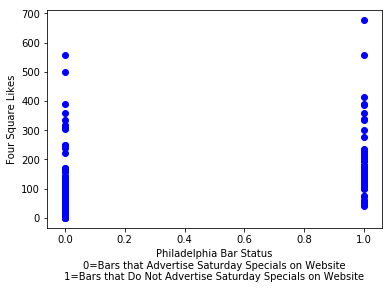

In [63]:
plt.scatter(linear_reg_df_clean4.Bar_Status, linear_reg_df_clean4.Four_Square_Likes,  color='blue')
plt.xlabel("Philadelphia Bar Status" + "\n" + "0=Bars that Advertise Saturday Specials on Website" + "\n" + "1=Bars that Do Not Advertise Saturday Specials on Website")
plt.ylabel("Four Square Likes")
plt.show()

# Create a train and test dataset for linear regression analysis

In [67]:
msk = np.random.rand(len(linear_reg_df_clean4)) < 0.8
train = linear_reg_df_clean4[msk]
test = linear_reg_df_clean4[~msk]

# Perform the Linear Regression Analysis on the train set

In [68]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Bar_Status']])
train_y = np.asanyarray(train[['Four_Square_Likes']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 90.65099458]]
Intercept:  [ 101.28571429]


# Plot the outputs

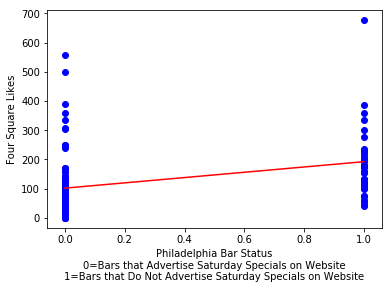

In [69]:
plt.scatter(train.Bar_Status, train.Four_Square_Likes,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Philadelphia Bar Status" + "\n" + "0=Bars that Advertise Saturday Specials on Website" + "\n" + "1=Bars that Do Not Advertise Saturday Specials on Website")
plt.ylabel("Four Square Likes")
plt.show()

# Use test set to predict four_square likes and calculate accuracy of linear regression model using Mean absolute error, Residual sum of squares (MSE), and R2-score

In [71]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Bar_Status']])
test_y = np.asanyarray(test[['Four_Square_Likes']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 67.13
Residual sum of squares (MSE): 10571.03
R2-score: -4.22
